# Random Forest

This script is to perform Random Forest for the processed embedding array.

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pickle
from collections import Counter

## Loading array from csv file

In [3]:
## Loading embedding arrays
with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/X_spectral_embeddings.csv') as file_name:
    X_embedding = np.loadtxt(file_name, delimiter=",")
print(X_embedding.shape)

(16360, 300)


In [4]:
## Loading class labels
import csv

with open('/mnt/scratch/ding013/MS2ChemClass/embedding_arrays_for_classification/y_npc_class_results_labels.csv') as file_name:
    csv_label = csv.reader(file_name)
    y_label_list = []
    for row in csv_label:
        y_label_list.append(row[0])
y_label = np.array(y_label_list)
print(y_label.shape)

(16360,)


## Get the proper parameters

clf = RandomForestClassifier(n_estimators=160, random_state=0)

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

rsh = HalvingRandomSearchCV(estimator=clf, param_distributions=param_dist,
                            factor=2, random_state=0)
rsh.fit(X_embedding, y_label_list)
rsh.best_params_

## Random Forest for training and test sets

In [7]:
# Kick out the unexpected groups
lbs = Counter(y_label)
lbs = {k:v for k,v in sorted(lbs.items(), key=lambda item: item[1], reverse=True)}
sel_index = list(lbs.values()).index(3) # find the first index whose values just smaller than 4
select_lbs = list(lbs.keys())[:sel_index]
select_lbs.remove('Unclassified')
print(len(select_lbs))

303


In [8]:
# Define the data

select_index = []
for i in select_lbs:
    temp_index, = np.where(y_label==i)
    #print(temp_index)
    select_index += list(temp_index)
select_index.sort()
#print(select_index)

y_label_2 = np.array(y_label[select_index])
print(y_label_2.shape)

X_embedding_2=X_embedding[select_index,:]
print(X_embedding_2.shape)

(12823,)
(12823, 300)


In [9]:
# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_embedding_2, y_label_2, test_size = 0.25, random_state = 0, stratify=y_label_2)



In [41]:
X_test.shape

(4090, 300)

In [10]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
## Train Model
import time
t0=time.process_time()
# Instantiate model with 10 decision trees
rf = RandomForestClassifier(n_estimators = 160, random_state = 0)
# Train the model on training data
rf.fit(X_train, y_train)
t1=time.process_time()-t0
y_pred = rf.predict(X_test)
print('Processing time: %.3f' % t1)

## Evaluate the model
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
labels =list(np.unique(np.array(list(y_test)+list(y_pred))))

Processing time: 198.000
Accuracy: 0.313


In [ ]:
a={k:list(y_test).count(k) for k in labels}
#print(a)

In [12]:
from calculate_accuracy19 import calculate_accuracy_per_label
labels_a = list(np.unique(np.array(list(y_test)+list(y_pred))))
accuracy_dict = calculate_accuracy_per_label(labels_a, conf_mat,list(y_train))
print(accuracy_dict.keys())
save_accuracy_file = open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label/NPC_accuracy_RF_Class_allgroups.pickle', "wb")
pickle.dump(accuracy_dict, save_accuracy_file)
save_accuracy_file.close()

0 1
0 11
0 1
0 2
0 2
0 1
1 8
0 2
0 7
1 2
2 6
0 11
0 2
1 4
4 9
1 8
1 3
99 55
2 2
0 10
0 3
11 19
2 8
3 15
1 10
1 3
0 4
4 26
0 2
0 3
0 3
8 22
0 1
0 9
0 1
0 1
2 17
0 2
0 1
0 7
0 2
1 10
2 3
0 7
0 5
0 3
0 5
0 4
2 6
0 2
0 2
0 1
1 6
0 2
83 63
8 18
51 38
1 4
0 1
0 6
0 5
0 5
8 9
12 38
85 42
4 19
13 22
0 6
28 46
7 14
37 34
0 2
6 15
0 3
0 3
0 1
448 139
0 1
1 7
3 6
2 15
0 1
0 3
4 19
0 4
0 9
0 2
0 5
1 3
0 3
1 14
1 9
0 2
158 75
2 6
6 16
1 4
1 3
2 1
0 5
0 6
2 7
0 5
0 9
11 15
0 2
0 4
0 5
2 8
3 7
0 8
1 1
2 7
18 32
172 70
0 1
143 68
0 2
0 4
0 5
4 26
0 8
2 8
0 1
6 7
10 20
0 2
0 4
0 1
89 55
19 23
0 2
0 6
0 5
0 1
13 14
0 1
0 3
0 3
0 4
1 11
1 1
0 2
1 1
1 5
1 23
3 12
0 4
0 3
1 3
23 36
0 1
2 20
0 7
34 39
0 3
0 1
52 52
0 2
10 12
0 9
0 4
31 21
0 1
0 5
1 12
2 5
21 17
6 13
22 42
0 1
0 3
0 5
0 1
0 4
1 2
2 6
1 9
5 11
0 1
0 1
0 1
1 3
2 7
0 1
1 14
1 9
0 2
1 3
16 27
0 5
0 3
1 13
0 6
3 16
0 3
0 2
81 65
0 1
2 19
0 2
1 1
1 5
0 3
0 1
0 1
0 1
0 1
0 2
0 5
0 1
0 11
4 16
7 27
2 6
2 17
2 12
0 5
0 2
2 3
0 5
0 3
5 28
1 10
1 4
0 1

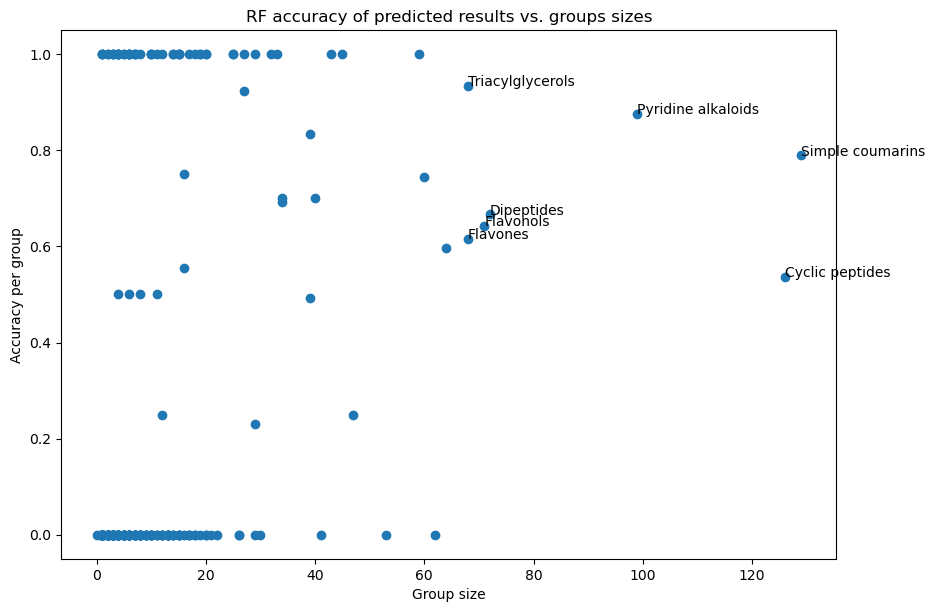

In [13]:
# accuracy vs. group size
x= accuracy_dict['group_size_test']
y= accuracy_dict['accuracy']
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(x, y)

plt.title('RF accuracy of predicted results vs. groups sizes')
plt.xlabel('Group size')
plt.ylabel('Accuracy per group')
for i,txt in enumerate(labels_a):
    if x[i] > 65:
        plt.annotate(txt,(x[i],y[i]))
plt.show()

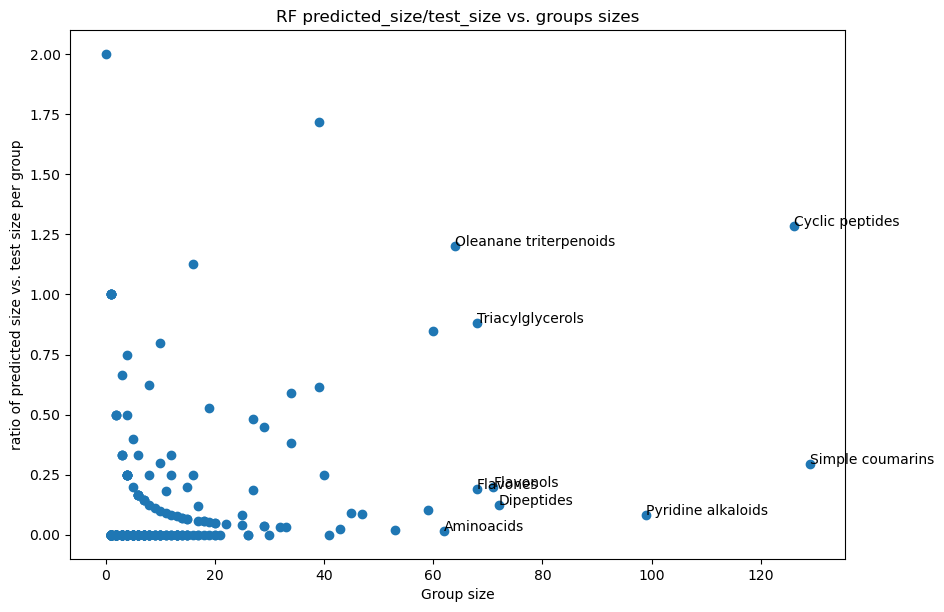

In [14]:
# predicted_size/test_size vs. group size
x= accuracy_dict['group_size_test']
y= accuracy_dict['predict_vs_test_size']
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(x, y)

plt.title('RF predicted_size/test_size vs. groups sizes')
plt.xlabel('Group size')
plt.ylabel('ratio of predicted size vs. test size per group')
for i,txt in enumerate(labels_a):
    if x[i] > 60:
        plt.annotate(txt,(x[i],y[i]))
plt.show()

## Select top 2 major groups to do Random Forest

In [14]:
# Select major groups
from collections import Counter
lbs = Counter(y_label)
lbs = {k:v for k,v in sorted(lbs.items(), key=lambda item: item[1], reverse=True)}
print(list(lbs.values())[1:3])
select_lbs = list(lbs.keys())[1:3]
print(select_lbs)

# Define the data
select_index = []
for i in select_lbs:
    temp_index, = np.where(y_label==i)
    #print(temp_index)
    select_index += list(temp_index)
select_index.sort()
#print(select_index)

y_label_2_main = np.array(y_label[select_index])
print(y_label_2_main.shape)

X_embedding_2_lbs=X_embedding[select_index,:]
print(X_embedding_2_lbs.shape)



[557, 531]
['Cyclic peptides', 'Simple coumarins']
(1088,)
(1088, 300)


In [16]:
### Perform Random Forest
# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_embedding_2_lbs, y_label_2_main, test_size = 0.25, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train Model
t0=time.process_time()
# Instantiate model with 10 decision trees
rf = RandomForestClassifier(n_estimators = 160, random_state = 0)
# Train the model on training data
rf.fit(X_train, y_train)
t1=time.process_time()-t0
y_pred = rf.predict(X_test)
print('Processing time: %.3f' % t1)

## Evaluate the model
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)

conf_mat = confusion_matrix(y_test,y_pred)
#print(conf_mat.shape)

Processing time: 1.118
Accuracy: 0.952


<AxesSubplot:xlabel='Predicted labels', ylabel='Actual labels'>

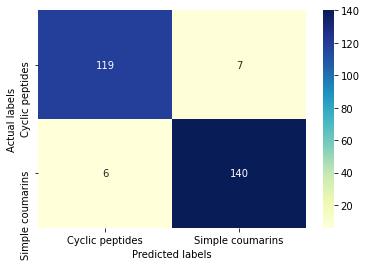

In [21]:
# Plot Confusion matrix
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#plt.figure(figsize = (80,80))
ax= plt.subplot()
df_cm = pd.DataFrame(conf_mat, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual labels'
df_cm.columns.name = 'Predicted labels'
sns.heatmap(df_cm, annot=True, ax = ax, cmap="YlGnBu", fmt='d')



## Select multi groups to do Random Forest

In [45]:
# Select major groups
from collections import Counter
lbs = Counter(y_label)
lbs = {k:v for k,v in sorted(lbs.items(), key=lambda item: item[1], reverse=True)}
print(list(lbs.values())[1:31])
select_lbs = list(lbs.keys())[1:31]
print(select_lbs)

# Define the data
select_index = []
for i in select_lbs:
    temp_index, = np.where(y_label==i)
    #print(temp_index)
    select_index += list(temp_index)
select_index.sort()
#print(select_index)

y_label_2_main = np.array(y_label[select_index])
print(y_label_2_main.shape)

X_embedding_2_lbs=X_embedding[select_index,:]
print(X_embedding_2_lbs.shape)



[557, 531, 394, 299, 279, 271, 259, 252, 247, 221, 221, 206, 182, 169, 167, 157, 153, 150, 145, 137, 129, 128, 127, 120, 113, 109, 109, 108, 103, 103]
['Cyclic peptides', 'Simple coumarins', 'Pyridine alkaloids', 'Dipeptides', 'Flavones', 'Flavonols', 'Oleanane triterpenoids', 'Carboline alkaloids', 'Triacylglycerols', 'Aminoacids', 'Glycerophosphocholines', 'Isoquinoline alkaloids', 'Cinnamic acids and derivatives', 'Linear peptides', 'Cholane steroids', 'Isoflavones', 'Carotenoids (C40', 'Chalcones', 'Iridoids monoterpenoids', 'Corynanthe type', 'Flavanones', 'Simple indole alkaloids', 'Pregnane steroids', 'Simple phenolic acids', 'Piperidine alkaloids', 'Tripeptides', 'Phenylalanine-derived alkaloids', 'N-acyl amines', 'Anthraquinones and anthrones', 'Furocoumarins']
(6146,)
(6146, 300)


In [46]:
### Perform Random Forest
# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_embedding_2_lbs, y_label_2_main, test_size = 0.25, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train Model
t0=time.process_time()
# Instantiate model with 10 decision trees
rf = RandomForestClassifier(n_estimators = 160, random_state = 0)
# Train the model on training data
rf.fit(X_train, y_train)
t1=time.process_time()-t0
y_pred = rf.predict(X_test)
print('Processing time: %.3f' % t1)

## Evaluate the model
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)

conf_mat = confusion_matrix(y_test,y_pred)
labels =list(np.unique(np.array(list(y_test)+list(y_pred))))
#print(conf_mat.shape)

Processing time: 14.594
Accuracy: 0.502


<AxesSubplot:xlabel='Predicted labels', ylabel='Actual labels'>

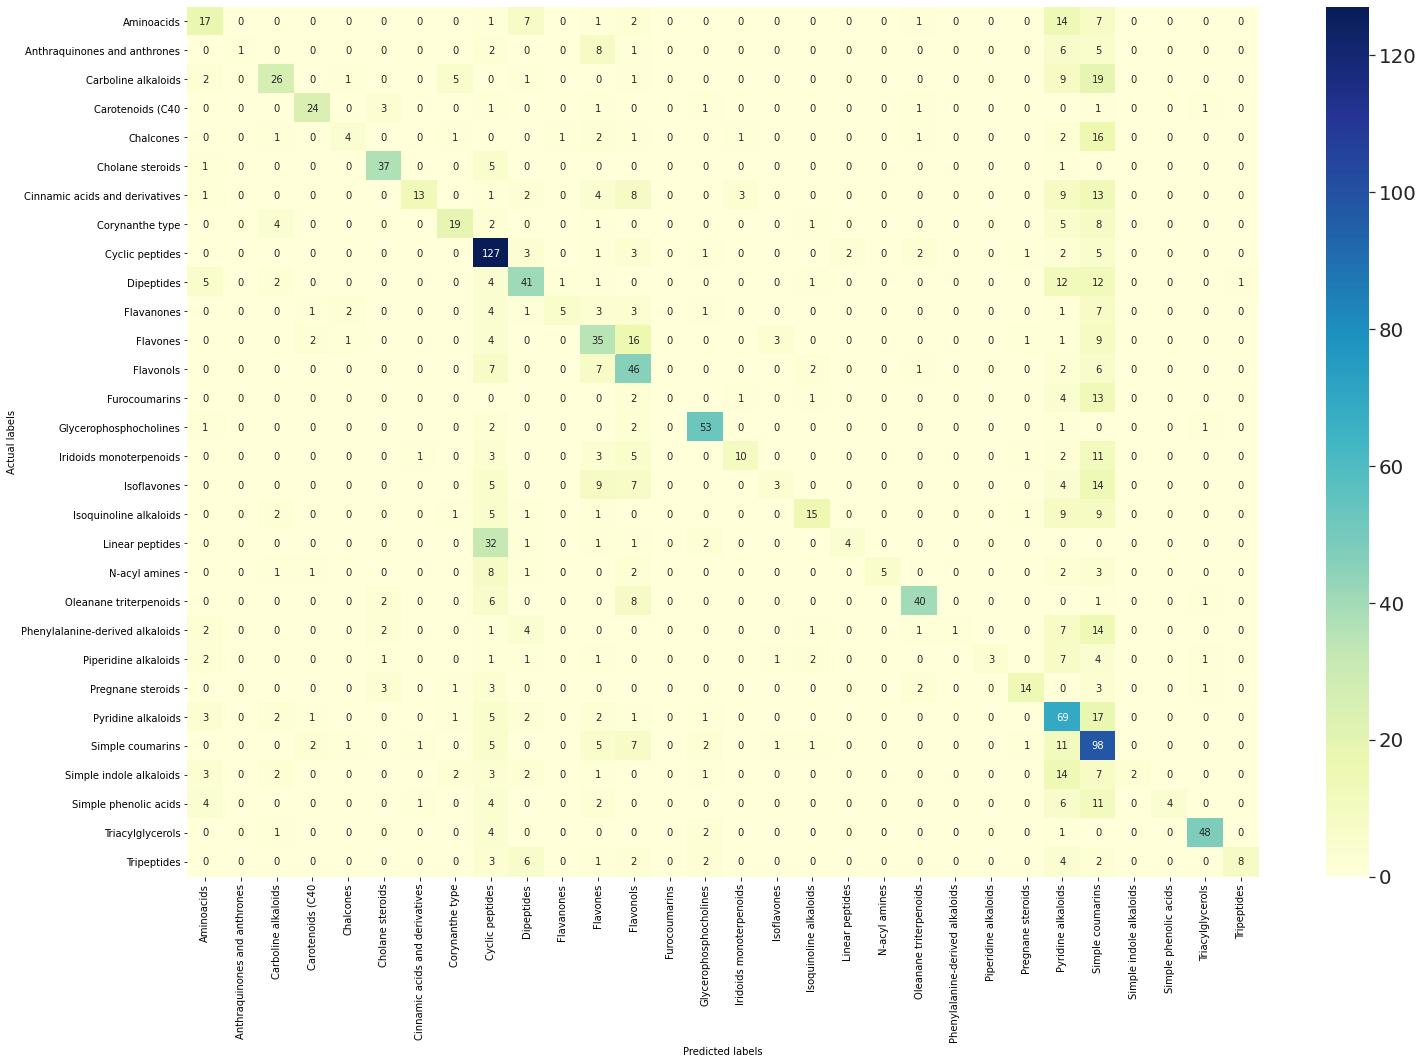

In [24]:
# Plot confusion matrix
plt.figure(figsize = (24,16))
ax= plt.subplot()
df_cm = pd.DataFrame(conf_mat, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual labels'
df_cm.columns.name = 'Predicted labels'
sns.set(font_scale=1.8)
sns.heatmap(df_cm, annot=True, ax = ax, cmap="YlGnBu", fmt='d',annot_kws={"size": 10})



In [47]:
from calculate_accuracy19 import calculate_accuracy_per_label
labels_a = labels
labels_a = list(np.unique(np.array(list(y_test)+list(y_pred))))
accuracy_dict = calculate_accuracy_per_label(labels_a, conf_mat,list(y_train))
print(accuracy_dict.keys())
save_accuracy_file = open('/mnt/scratch/ding013/MS2ChemClass/accuracy_per_label/NPC_accuracy_RF_Class_30groups.pickle', "wb")
pickle.dump(accuracy_dict, save_accuracy_file)
save_accuracy_file.close()

41 50
1 23
41 64
31 33
9 30
48 44
16 54
30 40
248 147
73 80
7 28
90 72
118 71
0 21
66 60
15 36
8 42
24 44
6 41
5 23
49 58
1 33
3 24
19 27
205 104
315 135
2 37
4 32
53 56
9 28
dict_keys(['labels', 'accuracy', 'predict_vs_test_size', 'group_size_pred', 'group_size_test', 'group_size_train'])


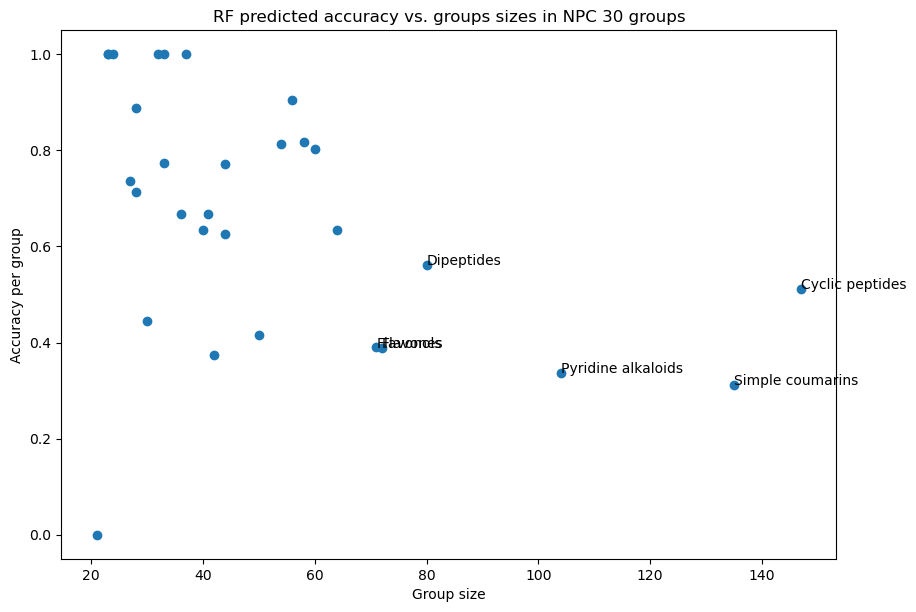

In [39]:

x= accuracy_dict['group_size_test']
y= accuracy_dict['accuracy']
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(x, y)

plt.title('RF predicted accuracy vs. groups sizes in NPC 30 groups')
plt.xlabel('Group size')
plt.ylabel('Accuracy per group')
for i,txt in enumerate(labels_a):
    if x[i] > 70:
        plt.annotate(txt,(x[i],y[i]))
plt.show()

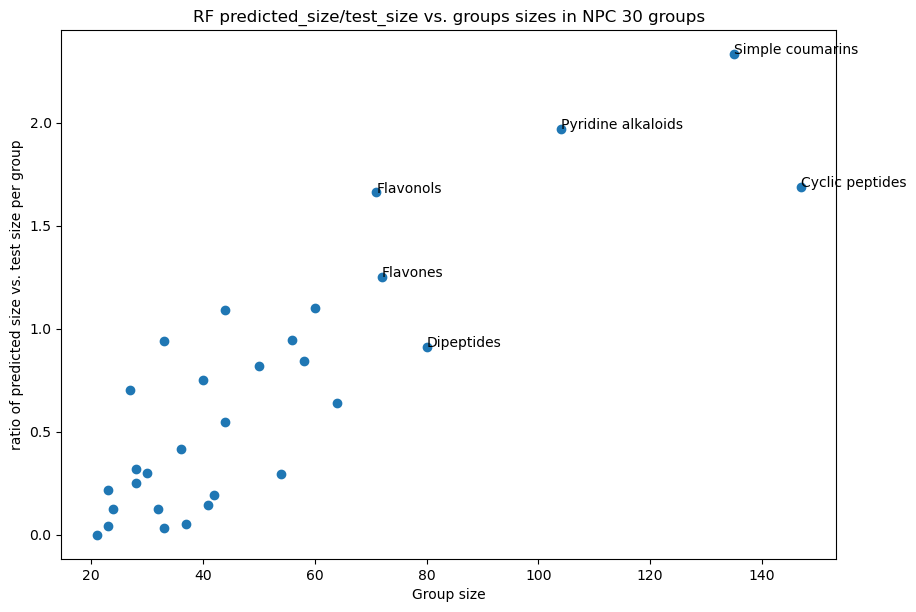

In [22]:

x= accuracy_dict['group_size_test']
y= accuracy_dict['predict_vs_test_size']
plt.rcParams.update({'figure.figsize':(10,7), 'figure.dpi':100})
plt.scatter(x, y)

plt.title('RF predicted_size/test_size vs. groups sizes in NPC 30 groups')
plt.xlabel('Group size')
plt.ylabel('ratio of predicted size vs. test size per group')
for i,txt in enumerate(labels_a):
    if x[i] > 70:
        plt.annotate(txt,(x[i],y[i]))
plt.show()